In [1]:
import numpy as np
import xarray as xr
import nc_time_axis
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import tracks
%matplotlib inline

#### 16-02-2026 - Final testing of seeds
The seeds now have a minimum duration of 21 hours, to avoid showing too much daily disturbances. The optimum minimum duration seems to be 24 hours, which can be obtained by filtering the track data. The 21 hours was chosen to allow for some sensitivity testing (against minimum duration).

In [2]:
ds_tc = tracks.load_tracks('../../tracker/jobs/Tracking_TC_RV/', ext='')

REF.001: 5.000 years, 475 tracks
REF.002: 5.000 years, 484 tracks
REF.003: 5.000 years, 496 tracks
REF.004: 5.000 years, 500 tracks
REF.005: 5.000 years, 523 tracks
REF.006: 5.000 years, 462 tracks
RCP.001: 5.000 years, 445 tracks
RCP.002: 5.000 years, 437 tracks
RCP.003: 5.000 years, 459 tracks
RCP.004: 5.000 years, 464 tracks
RCP.005: 5.000 years, 455 tracks
RCP.006: 5.000 years, 473 tracks
SAI.001: 5.000 years, 425 tracks
SAI.002: 5.000 years, 430 tracks
SAI.003: 5.000 years, 412 tracks
SAI.004: 5.000 years, 430 tracks
SAI.005: 5.000 years, 406 tracks
SAI.006: 5.000 years, 421 tracks


In [4]:
ds_sd = tracks.load_tracks('../../tracker/jobs/Tracking_TC_RV.seeds2/', ext='.seeds2')

REF.001: 5.000 years, 2026 tracks
REF.002: 5.000 years, 2063 tracks
REF.003: 5.000 years, 2088 tracks
REF.004: 5.000 years, 2080 tracks
REF.005: 5.000 years, 2184 tracks
REF.006: 5.000 years, 2005 tracks
RCP.001: 5.000 years, 1854 tracks
RCP.002: 5.000 years, 1745 tracks
RCP.003: 5.000 years, 1698 tracks
RCP.004: 5.000 years, 1759 tracks
RCP.005: 5.000 years, 1808 tracks
RCP.006: 5.000 years, 1784 tracks
SAI.001: 5.000 years, 1697 tracks
SAI.002: 5.000 years, 1843 tracks
SAI.003: 5.000 years, 1795 tracks
SAI.004: 5.000 years, 1894 tracks
SAI.005: 5.000 years, 1783 tracks
SAI.006: 5.000 years, 1696 tracks


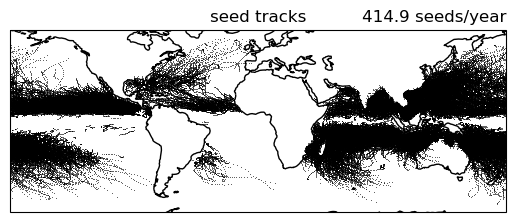

In [6]:
exp = 'Reference'
ax = plt.axes(projection=ccrs.PlateCarree())
ds_sd[exp].plot.scatter(ax=ax, x='lon', y='lat', c='k', edgecolors='k', linewidths=0.001, s=0.25, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('seed tracks')
_=ax.set_title(f'{ds_sd[exp].id.size/ds_sd[exp].num_days*365:.1f} seeds/year', loc='right')

Text(0.5, 1.0, 'seed tracks (initial 24 hours)')

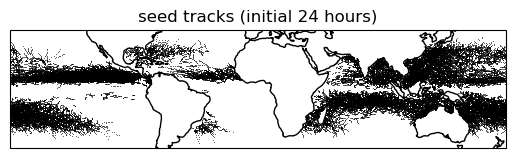

In [7]:
exp = 'Reference'
ax = plt.axes(projection=ccrs.PlateCarree())
ds_sd[exp].isel(dtime=range(0,8)).plot.scatter(ax=ax, x='lon', y='lat', c='k', edgecolors='k', linewidths=0.001, s=0.25, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('seed tracks (initial 24 hours)')

Text(0, 0.5, 'seeds/year')

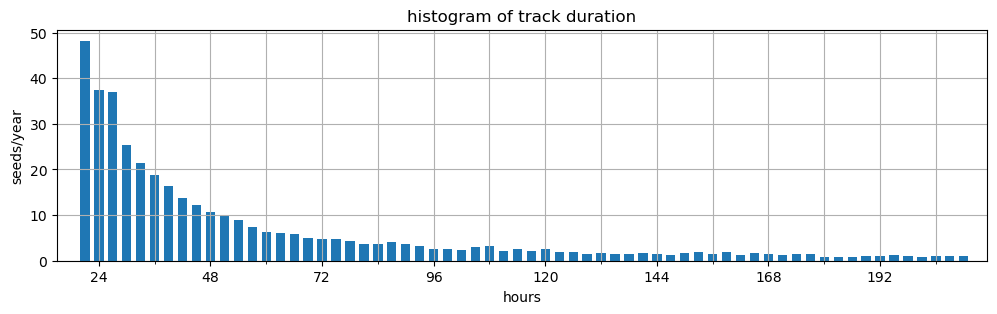

In [10]:
exp = 'Reference'
fig=plt.figure(figsize=(12,3))
ax = plt.axes()
track_size = ds_sd[exp].time.notnull().sum('dtime') * 3 # track duration [hours]
hist, bins = np.histogram(track_size, np.arange(-1.5,213,3))
ax.bar((bins[1:]+bins[:-1])/2, hist/ds_sd[exp].num_days.item()*365, width=2)
#track_size.plot.hist(ax=ax, bins=np.arange(0,9,0.25))
#_=plt.xticks(range(0,9,1))
ax.set_xticks(range(0,213,24))
ax.set_xticks(range(0,213,12), minor=True)
ax.set_xlim([15,215])
ax.grid(which='both')
ax.set_title('histogram of track duration')
ax.set_xlabel('hours')
ax.set_ylabel('seeds/year')

#### 13-02-25 - preliminary testing
The seeds are not cut off at 17 m/s anymore, with a minimum duration of 12 hours and run as long as new valid points are found (just as TCs). It seems like we can now match all TCs to a seed.

In [2]:
ds_tc = tracks.load_tracks('../../tracker/jobs/Tracking_TC_RV/', ext='')

REF.001: 5.000 years, 475 tracks
REF.002: 5.000 years, 484 tracks
REF.003: 5.000 years, 496 tracks
REF.004: 5.000 years, 500 tracks
REF.005: 5.000 years, 523 tracks
REF.006: 5.000 years, 462 tracks
RCP.001: 5.000 years, 445 tracks
RCP.002: 5.000 years, 437 tracks
RCP.003: 5.000 years, 459 tracks
RCP.004: 5.000 years, 464 tracks
RCP.005: 5.000 years, 455 tracks
RCP.006: 5.000 years, 473 tracks
SAI.001: 5.000 years, 425 tracks
SAI.002: 5.000 years, 430 tracks
SAI.003: 5.000 years, 412 tracks
SAI.004: 5.000 years, 430 tracks
SAI.005: 5.000 years, 406 tracks
SAI.006: 5.000 years, 421 tracks


In [3]:
#ds_sd = tracks.load_tracks('../../tracker/jobs/Tracking_TC_RV.seeds2/', ext='.seeds2')
ds_sd = tracks.load_track_file('../../tracker/jobs/Tracking_TC_RV.seeds2/TC_tracks.ref.001.seeds2.nc')
print(f"REF.001: {ds_sd.num_days/365:.3f} years, {ds_sd.id.size:d} tracks")

REF.001: 5.000 years, 3698 tracks


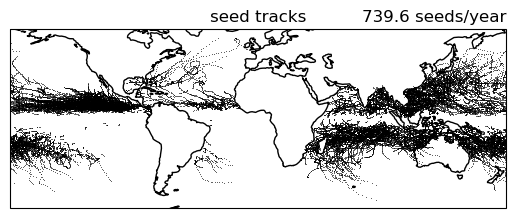

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ds_sd.plot.scatter(ax=ax, x='lon', y='lat', c='k', edgecolors='k', linewidths=0.001, s=0.25, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('seed tracks')
_=ax.set_title(f'{ds_sd.id.size/ds_sd.num_days*365:.1f} seeds/year', loc='right')

Text(0.5, 1.0, 'seed tracks (initial 24 hours)')

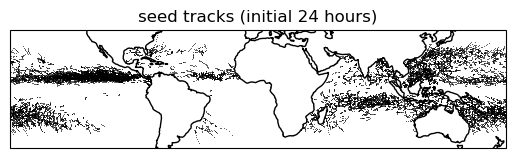

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
ds_sd.isel(dtime=range(0,8)).plot.scatter(ax=ax, x='lon', y='lat', c='k', edgecolors='k', linewidths=0.001, s=0.25, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('seed tracks (initial 24 hours)')

Text(0, 0.5, 'seeds/year')

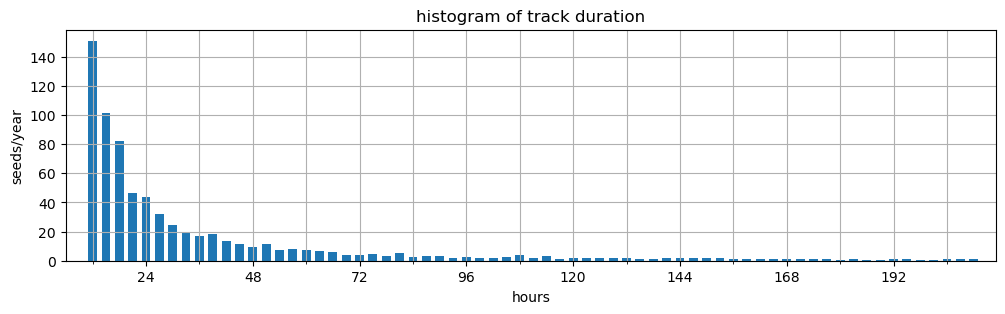

In [7]:
fig=plt.figure(figsize=(12,3))
ax = plt.axes()
track_size = ds_sd.time.notnull().sum('dtime') * 3 # track duration [hours]
hist, bins = np.histogram(track_size, np.arange(-1.5,213,3))
ax.bar((bins[1:]+bins[:-1])/2, hist/ds_sd.num_days.item()*365, width=2)
#track_size.plot.hist(ax=ax, bins=np.arange(0,9,0.25))
#_=plt.xticks(range(0,9,1))
ax.set_xticks(range(0,213,24))
ax.set_xticks(range(0,213,12), minor=True)
ax.set_xlim([6,215])
ax.grid(which='both')
ax.set_title('histogram of track duration')
ax.set_xlabel('hours')
ax.set_ylabel('seeds/year')

In [8]:
# # select Ref.001
# dsi_tc = ds_tc['Reference'].where(ds_tc['Reference'].ens==1, drop=True)
# dsi_sd = ds_sd['Reference'].where(ds_sd['Reference'].ens==1, drop=True)

# # loop through mature TCs
# for tid in dsi_tc.id.astype('int'):
#     tc = dsi_tc.sel(id=tid).isel(dtime=0)
#     time = tc.time.item() # initial TC time, try to find in seeds
#     sds = dsi_sd.where(dsi_sd.time==time, drop=True)
#     if sds.id.size == 0:
#         print(tid.item(), '-')
#         continue
#     dlon = (sds.lon - tc.lon + 540) %360 - 180
#     dlat = (sds.lat - tc.lat)
#     dist = np.sqrt(dlon**2 + dlat**2)
#     print(tid.item(), dist.min().item())

In [9]:
# select Ref.001
dsi_tc = ds_tc['Reference'].where(ds_tc['Reference'].ens==1, drop=True)
#dsi_sd = ds_sd['Reference'].where(ds_sd['Reference'].ens==1, drop=True)
dsi_sd = ds_sd

# select TC with id=200
matches = []
for tid in dsi_tc.id.astype('int')[:]:
    # tid = 20
    tc = dsi_tc.sel(id=tid).isel(dtime=0)
    time = tc.time.item()
    
    # select all final seed track points in the 12 hours prior to TC genesis
    #sds = dsi_sd.where((dsi_sd.time>=time-7) & (dsi_sd.time<=time), drop=True)
    sds = dsi_sd.where(dsi_sd.time==time, drop=True)
    if sds.id.size == 0:
        print(f"TC {int(tid):03d} X no match")
        continue
    sds = sds.isel(dtime=sds.time.argmax('dtime'))
    
    
    # calculate distance in degrees between last seed position and TC genesis position
    dlon = (sds.lon - tc.lon + 540) %360 - 180
    dlat = (sds.lat - tc.lat)
    dist = np.sqrt(dlon**2 + dlat**2)
    
    # calculate time difference between last seed occurrence and TC genesis
    dtime = tc.time - sds.time

    # loop through seed distances, in order of ascending time difference
    match = False
    for dst in dist.sortby(dtime): 
        dt = dtime.sel(id=dst.id)
        if dst < dt * 12 + 0.1: # maximum speed 12 deg/day ~55 km/h
            match = True
            matches.append(int(dst.id))
            print(f"TC {int(tid):03d} > SD {int(dst.id):04}: dist = {dst:6.2f} deg, dt = {dt:5.3f} days")
            break
    if not match:
        print(f"TC {int(tid):03d} X no match")
print(f"num matches = {len(matches)} ({len(matches)/dsi_tc.id.size*100:.1f} %)")
print(f"num unique = {len(np.unique(matches))} ({len(np.unique(matches))/dsi_tc.id.size*100:.1f} %)")

TC 001 > SD 0017: dist =   0.00 deg, dt = 0.000 days
TC 002 > SD 0018: dist =   0.00 deg, dt = 0.000 days
TC 003 > SD 0035: dist =   0.00 deg, dt = 0.000 days
TC 004 > SD 0041: dist =   0.00 deg, dt = 0.000 days
TC 005 > SD 0043: dist =   0.00 deg, dt = 0.000 days
TC 006 > SD 0046: dist =   0.00 deg, dt = 0.000 days
TC 007 > SD 0056: dist =   0.00 deg, dt = 0.000 days
TC 008 > SD 0057: dist =   0.00 deg, dt = 0.000 days
TC 009 > SD 0060: dist =   0.00 deg, dt = 0.000 days
TC 010 > SD 0072: dist =   0.00 deg, dt = 0.000 days
TC 011 > SD 0075: dist =   0.00 deg, dt = 0.000 days
TC 012 > SD 0077: dist =   0.00 deg, dt = 0.000 days
TC 013 > SD 0082: dist =   0.00 deg, dt = 0.000 days
TC 014 > SD 0084: dist =   0.00 deg, dt = 0.000 days
TC 015 > SD 0094: dist =   0.00 deg, dt = 0.000 days
TC 016 > SD 0098: dist =   0.00 deg, dt = 0.000 days


KeyboardInterrupt: 